In [107]:
import numpy as np
import matplotlib.pyplot as plt


In [108]:

def perceptron(X: np.ndarray, y0: np.ndarray, eta=0.1  , tmax=1000):
    N, P = X.shape
    w = np.random.rand(N)
    converged = False

    for epoch in range(tmax):
        dot_product = np.dot(X.T, w)

        y_pred = np.sign(dot_product).flatten()
        y_pred[y_pred == 0] = -1  # Replace 0 with 1
        misclassified = np.where(y_pred != y0)[0]

        if misclassified.size == 0:
            converged = True
            break

        update = np.sum(X[:, misclassified] * y0[misclassified], axis=1)
        w += eta*update

    return w, converged, epoch + 1

In [109]:
# Example usage:
# X is the input matrix, y0 is the label vector
X = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])  # Assuming 2D points
y0 = np.array([-1, -1, -1, 1])  # Corresponding labels
(w, converged, epoch) = perceptron(X, y0)
# Generate x values

# x_values = np.linspace(0, 5, 100)
# y_values = w * x_values
# plt.plot(x_values, y_values)

[ 1.40172247 -1.5549141 ] True 2


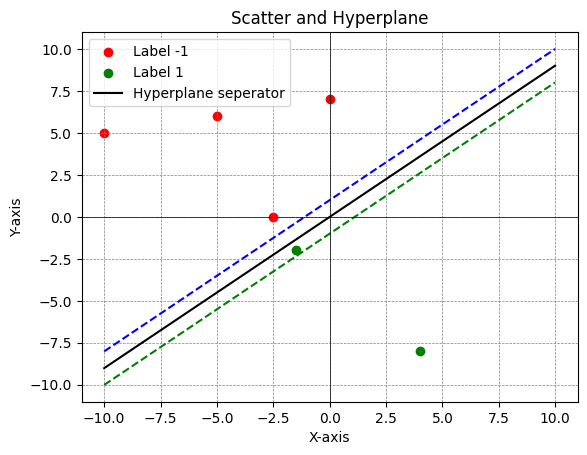

In [110]:
def plot(X, y0, w):
    """
    Parameters:
    - X: N x P matrix of points
    - y0: P-dimensional vector of labels (-1 or 1)
    - w: Coefficients of the hyperplane.
    """
    # Scatter points based on labels
    plt.scatter(X[0, y0 == -1], X[1, y0 == -1], color='red', label='Label -1')
    plt.scatter(X[0, y0 == 1], X[1, y0 == 1], color='green', label='Label 1')

    # Plot the hyperplane
    # perpendicular_v = perpendicular_vector(w)
    perpendicular_v = w
    x_points = np.linspace(-10, 10, 100)
    y_points_hyperplane = -(perpendicular_v[0] * x_points) / perpendicular_v[1]
    plt.plot(x_points, y_points_hyperplane, label='Hyperplane seperator', color='black')

    # Plot lines on either side for separation
    y_points_above = y_points_hyperplane + 1
    y_points_below = y_points_hyperplane - 1
    plt.plot(x_points, y_points_above, linestyle='--', color='blue')
    plt.plot(x_points, y_points_below, linestyle='--', color='green')

    # Add labels and legend
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Scatter and Hyperplane')
    plt.legend()

    # Add grid lines
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)

    # Show the plot
    plt.show()

# Example usage:
# X is the input matrix, y0 is the label vector
X = np.array([[-10,5], [-5,6],[-2.5, 0], [0,7], [4,-8], [-1.5,-2]]).T  # Assuming 2D points
y0 = np.array([-1, -1, -1, -1, 1, 1])  # Corresponding labels
(w, converged, epoch) = perceptron(X, y0)
print(w, converged, epoch)
plot(X, y0, w)


In [113]:
def generate_random_data(N, P):
    """
    Generate random data with a matrix X of shape N x P and a label vector y0 of length P.

    Parameters:
    - N: Number of rows in the matrix.
    - P: Number of columns in the matrix and length of the label vector.

    Returns:
    - X: N x P matrix with random values from the set {-1, 1}.
    - y0: Random label vector of length P with values from the set {-1, 1}.
    """
    X = np.random.choice([-1, 1], size=(N, P))
    y0 = np.random.choice([-1, 1], size=P)

    return X, y0


Random Matrix X:
[[-1  1  1]
 [-1 -1 -1]
 [ 1  1 -1]
 [ 1  1 -1]
 [ 1 -1  1]]

Random Label Vector y0:
[-1 -1  1]


In [155]:
def get_average_number_of_epochs(n, N, P):
    epochs = np.zeros(n)
    for i in range(n):
        X, y0 = generate_random_data(N, P)
        # converged = False
        # while not converged:
        #     (w, converged, epoch) = perceptron(X, y0)    
        (w, converged, epoch) = perceptron(X, y0)    
        if not converged:
            print("wtffff")
        epochs[i] = epoch
    return np.mean(epochs)
            
        
def ex_2 (n=100):
    P = 10
    Ns = range(11,101, 10)
    mean_epochs = np.zeros(len(Ns))
    for i, N in enumerate(Ns):
        mean_epochs[i] = get_average_number_of_epochs(n, N, P)
    return Ns, mean_epochs
        
    

wtffff


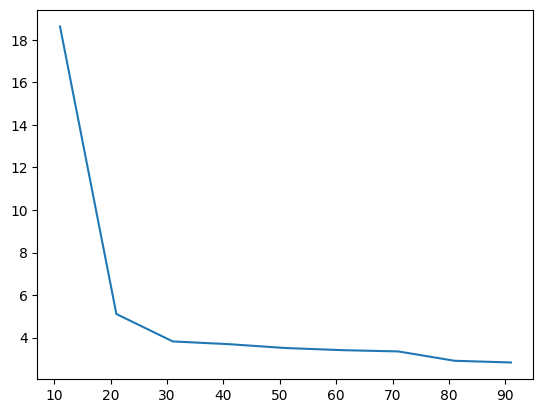

In [156]:
(Ns, epochs) = ex_2()
plt.plot(Ns, epochs)

In [ ]:
for 